# CSE 482 - Project

In [1]:
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
myAppToken = 'rEPOXGSegb5AUSutACzeimRkD'
client = Socrata('data.cityofchicago.org', myAppToken)

# this was the most data it would allow us to download
results = client.get('ijzp-q8t2', limit=600000)
df = pd.DataFrame.from_records(results)

In [59]:
data = df.drop(columns=[':@computed_region_awaf_s7ux', ':@computed_region_6mkv_f3dw', ':@computed_region_vrxf_vc4k', ':@computed_region_bdys_3d7i', 
                      ':@computed_region_43wa_7qmu', ':@computed_region_rpca_8um6', ':@computed_region_d9mm_jgwp', ':@computed_region_d3ds_rm58',
                      'id', 'case_number', 'block', 'iucr', 'domestic', 'beat', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate',
                       'updated_on', 'latitude', 'longitude', 'location'])
data.head()

,date,primary_type,description,location_description,arrest,district,year
0,2020-04-17T23:52:00.000,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",STREET,False,012,2020
1,2020-04-17T23:45:00.000,THEFT,OVER $500,CTA BUS,False,003,2020
2,2020-04-17T23:45:00.000,BATTERY,SIMPLE,NURSING / RETIREMENT HOME,False,020,2020
3,2020-04-17T23:41:00.000,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE - YARD (FRONT / BACK),False,005,2020
4,2020-04-17T23:40:00.000,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,009,2020


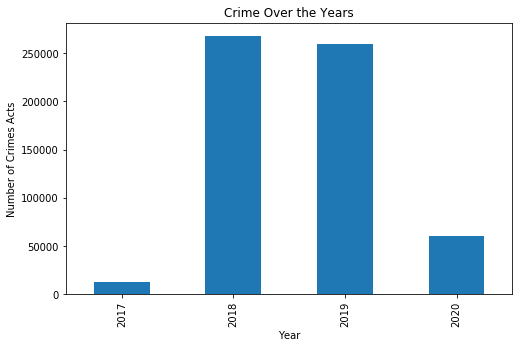

In [70]:


plt.figure(figsize = (8,5))
data.groupby([data['year']]).size().plot.bar()
plt.title('Crime Over the Years')

plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()

# 2017 is not fully included

011    42445
006    38106
008    36498
018    35153
001    34598
004    32202
007    31679
025    30007
012    29806
010    28665
003    28253
019    27330
005    26625
002    26182
009    25227
015    23048
014    20976
016    19307
022    18898
024    17945
017    16406
020    10624
031       19
Name: district, dtype: int64


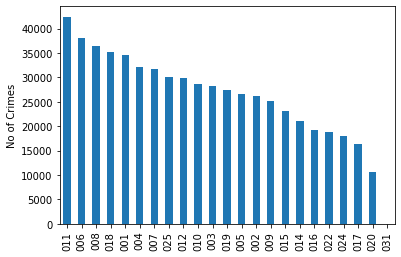

In [61]:

temp = data['district'].value_counts()
print(temp)

temp.plot(kind='bar')
plt.ylabel('No of Crimes')
plt.show()

# number of crimes per district

THEFT                                144358
BATTERY                              113542
CRIMINAL DAMAGE                       62146
ASSAULT                               46846
DECEPTIVE PRACTICE                    42623
OTHER OFFENSE                         38757
NARCOTICS                             31208
BURGLARY                              24155
MOTOR VEHICLE THEFT                   21911
ROBBERY                               20478
CRIMINAL TRESPASS                     15645
WEAPONS VIOLATION                     13691
OFFENSE INVOLVING CHILDREN             5302
CRIM SEXUAL ASSAULT                    3246
INTERFERENCE WITH PUBLIC OFFICER       3226
PUBLIC PEACE VIOLATION                 3225
SEX OFFENSE                            2750
PROSTITUTION                           1493
HOMICIDE                               1264
ARSON                                   857
LIQUOR LAW VIOLATION                    548
STALKING                                481
CRIMINAL SEXUAL ASSAULT         

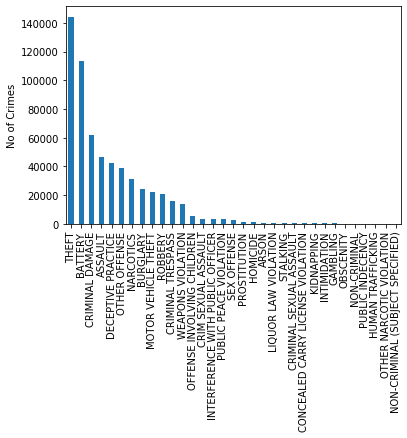

In [62]:
temp = data['primary_type'].value_counts()
print(temp)

temp.plot(kind='bar')
plt.ylabel('No of Crimes')
plt.show()
# number of crimes per primary type

In [63]:

data['month'] = data.apply(lambda row: int(row['date'][:10].split('-')[1]), axis=1)

# data.head()

In [64]:
temp_new = data.groupby(by=['year', 'month', 'primary_type']).count()
temp_new = temp_new.drop(index=['2017'])
# drop 2017 because it isn't complete

In [68]:
temp_new = temp_new.drop(columns=['description', 'location_description', 'arrest', 'district'])
temp_new = temp_new.rename(columns={'date': 'count'})
# temp_new.head(30)


In [79]:
pivot_test = pd.pivot_table(temp_new, values='count', index=['year', 'month'], columns=['primary_type']).reset_index()
pivot_test.head(30)
# pivot table into usable form

primary_type,year,month,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,2018,1,26.0,1416.0,3588.0,952.0,4.0,110.0,1930.0,3.0,...,NaN,1331.0,31.0,NaN,89.0,898.0,77.0,16.0,4850.0,410.0
1,2018,2,14.0,1355.0,3200.0,698.0,6.0,111.0,1672.0,5.0,...,NaN,1262.0,20.0,NaN,78.0,636.0,69.0,14.0,3896.0,306.0
2,2018,3,32.0,1619.0,3958.0,822.0,9.0,115.0,2337.0,2.0,...,NaN,1471.0,38.0,NaN,119.0,738.0,88.0,15.0,4750.0,393.0
3,2018,4,27.0,1641.0,3802.0,942.0,11.0,113.0,2240.0,7.0,...,NaN,1507.0,101.0,1.0,115.0,693.0,85.0,17.0,4996.0,399.0
4,2018,5,33.0,2036.0,4979.0,974.0,15.0,143.0,2670.0,6.0,...,NaN,1604.0,95.0,2.0,124.0,802.0,123.0,24.0,5735.0,542.0
5,2018,6,36.0,1880.0,4640.0,1064.0,14.0,150.0,2589.0,3.0,...,NaN,1512.0,65.0,4.0,137.0,857.0,89.0,18.0,6038.0,499.0
6,2018,7,41.0,1943.0,4883.0,1140.0,13.0,147.0,2726.0,8.0,...,NaN,1572.0,46.0,1.0,116.0,876.0,87.0,27.0,6167.0,550.0
7,2018,8,38.0,1849.0,4613.0,1213.0,17.0,144.0,2636.0,9.0,...,NaN,1501.0,74.0,1.0,121.0,942.0,126.0,15.0,6528.0,561.0
8,2018,9,32.0,1814.0,4351.0,1052.0,20.0,155.0,2287.0,6.0,...,NaN,1322.0,69.0,1.0,112.0,768.0,117.0,12.0,5785.0,487.0
9,2018,10,36.0,1717.0,4302.0,1004.0,19.0,144.0,2521.0,6.0,...,NaN,1385.0,48.0,1.0,112.0,837.0,111.0,15.0,5665.0,452.0


In [99]:
new_temp = pivot_test
for i in range(5, 13):
    #print(i)
    new_temp = new_temp.append({'year': '2020', 'month': str(i)}, ignore_index=True)
new_temp.fillna(value=0, inplace=True)

In [100]:
new_temp.head(36)

primary_type,year,month,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,2018,1,26.0,1416.0,3588.0,952.0,4.0,110.0,1930.0,3.0,...,0.0,1331.0,31.0,0.0,89.0,898.0,77.0,16.0,4850.0,410.0
1,2018,2,14.0,1355.0,3200.0,698.0,6.0,111.0,1672.0,5.0,...,0.0,1262.0,20.0,0.0,78.0,636.0,69.0,14.0,3896.0,306.0
2,2018,3,32.0,1619.0,3958.0,822.0,9.0,115.0,2337.0,2.0,...,0.0,1471.0,38.0,0.0,119.0,738.0,88.0,15.0,4750.0,393.0
3,2018,4,27.0,1641.0,3802.0,942.0,11.0,113.0,2240.0,7.0,...,0.0,1507.0,101.0,1.0,115.0,693.0,85.0,17.0,4996.0,399.0
4,2018,5,33.0,2036.0,4979.0,974.0,15.0,143.0,2670.0,6.0,...,0.0,1604.0,95.0,2.0,124.0,802.0,123.0,24.0,5735.0,542.0
5,2018,6,36.0,1880.0,4640.0,1064.0,14.0,150.0,2589.0,3.0,...,0.0,1512.0,65.0,4.0,137.0,857.0,89.0,18.0,6038.0,499.0
6,2018,7,41.0,1943.0,4883.0,1140.0,13.0,147.0,2726.0,8.0,...,0.0,1572.0,46.0,1.0,116.0,876.0,87.0,27.0,6167.0,550.0
7,2018,8,38.0,1849.0,4613.0,1213.0,17.0,144.0,2636.0,9.0,...,0.0,1501.0,74.0,1.0,121.0,942.0,126.0,15.0,6528.0,561.0
8,2018,9,32.0,1814.0,4351.0,1052.0,20.0,155.0,2287.0,6.0,...,0.0,1322.0,69.0,1.0,112.0,768.0,117.0,12.0,5785.0,487.0
9,2018,10,36.0,1717.0,4302.0,1004.0,19.0,144.0,2521.0,6.0,...,0.0,1385.0,48.0,1.0,112.0,837.0,111.0,15.0,5665.0,452.0


In [101]:
lst = []
indx = 0
while len(lst) < 24:
    temp = [ new_temp['BATTERY'][i + indx] for i in range(12) ]
    lst.append(temp)
    indx += 1

X = pd.DataFrame(lst)
X.columns = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1']
X

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
0,3588.0,3200.0,3958.0,3802.0,4979.0,4640.0,4883.0,4613.0,4351.0,4302.0,3638.0,3858.0
1,3200.0,3958.0,3802.0,4979.0,4640.0,4883.0,4613.0,4351.0,4302.0,3638.0,3858.0,3519.0
2,3958.0,3802.0,4979.0,4640.0,4883.0,4613.0,4351.0,4302.0,3638.0,3858.0,3519.0,3343.0
3,3802.0,4979.0,4640.0,4883.0,4613.0,4351.0,4302.0,3638.0,3858.0,3519.0,3343.0,4058.0
4,4979.0,4640.0,4883.0,4613.0,4351.0,4302.0,3638.0,3858.0,3519.0,3343.0,4058.0,3975.0
5,4640.0,4883.0,4613.0,4351.0,4302.0,3638.0,3858.0,3519.0,3343.0,4058.0,3975.0,4758.0
6,4883.0,4613.0,4351.0,4302.0,3638.0,3858.0,3519.0,3343.0,4058.0,3975.0,4758.0,4747.0
7,4613.0,4351.0,4302.0,3638.0,3858.0,3519.0,3343.0,4058.0,3975.0,4758.0,4747.0,4870.0
8,4351.0,4302.0,3638.0,3858.0,3519.0,3343.0,4058.0,3975.0,4758.0,4747.0,4870.0,4553.0
9,4302.0,3638.0,3858.0,3519.0,3343.0,4058.0,3975.0,4758.0,4747.0,4870.0,4553.0,4318.0


In [105]:
y = [ new_temp['BATTERY'][i] for i in range(12, 36) ]


y = pd.DataFrame(y)
y.fillna(value=0, inplace=True)
y

,0
0,3519.0
1,3343.0
2,4058.0
3,3975.0
4,4758.0
5,4747.0
6,4870.0
7,4553.0
8,4318.0
9,3863.0


In [110]:
X_train = X[:18]
X_test = X[18:]
y_train = y[:18]
y_test = y[18:]
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      t-12    t-11    t-10     t-9     t-8     t-7     t-6     t-5     t-4  \
0   3588.0  3200.0  3958.0  3802.0  4979.0  4640.0  4883.0  4613.0  4351.0   
1   3200.0  3958.0  3802.0  4979.0  4640.0  4883.0  4613.0  4351.0  4302.0   
2   3958.0  3802.0  4979.0  4640.0  4883.0  4613.0  4351.0  4302.0  3638.0   
3   3802.0  4979.0  4640.0  4883.0  4613.0  4351.0  4302.0  3638.0  3858.0   
4   4979.0  4640.0  4883.0  4613.0  4351.0  4302.0  3638.0  3858.0  3519.0   
5   4640.0  4883.0  4613.0  4351.0  4302.0  3638.0  3858.0  3519.0  3343.0   
6   4883.0  4613.0  4351.0  4302.0  3638.0  3858.0  3519.0  3343.0  4058.0   
7   4613.0  4351.0  4302.0  3638.0  3858.0  3519.0  3343.0  4058.0  3975.0   
8   4351.0  4302.0  3638.0  3858.0  3519.0  3343.0  4058.0  3975.0  4758.0   
9   4302.0  3638.0  3858.0  3519.0  3343.0  4058.0  3975.0  4758.0  4747.0   
10  3638.0  3858.0  3519.0  3343.0  4058.0  3975.0  4758.0  4747.0  4870.0   
11  3858.0  3519.0  3343.0  4058.0  3975.0  4758.0  4747.0  4870

[[ -221.31843535]
 [ 3031.94486579]
 [ 6142.24098525]
 [ 1577.53912095]
 [-1442.93302942]
 [ 2677.59057889]]
Test accuracy:
Root mean squared error = 3128.0711
R-square = 0.0000


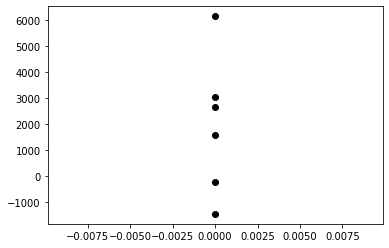

In [112]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred_test = regr.predict(X_test)
print(y_pred_test)
print('Test accuracy:')
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R-square = %.4f" % r2_score(y_test, y_pred_test))

plt.scatter(y_test, y_pred_test, color='black')

In [113]:
print('Slope Coefficients:', regr.coef_[0])
print('Intercept:', regr.intercept_[0])

Slope Coefficients: [ 0.61784417 -0.78424923  0.24492018  0.46225998 -1.5785738  -0.41018259
  2.09874614  0.25612604 -1.7105663  -0.36765603  0.03640789  1.37332817]
Intercept: 3066.064818837093


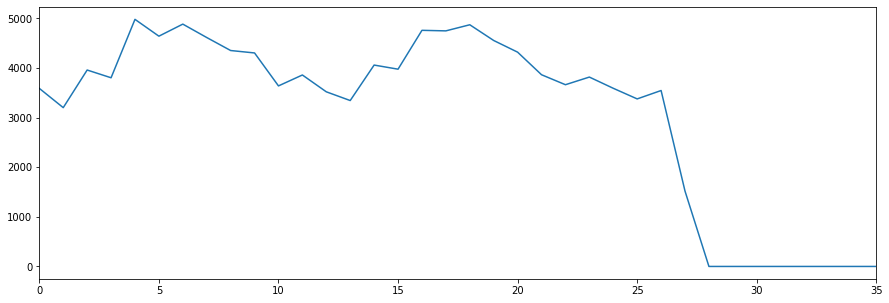

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

new_temp["BATTERY"].plot(kind='line', figsize=(15,5))

In [132]:
def monthlyStandardize(months, values):
    temp = {}
    for i in range(len(months)):
        try:
            temp[months[i]].append(values[i])
        except:
            temp[months[i]] = [values[i]]
            
    Z = [] 
    for i in range(len(months)):
        Z.append((values[i] - pd.Series(temp[months[i]]).mean()) / pd.Series(temp[months[i]]).std())
    
    Z = pd.DataFrame(Z)

    return Z   

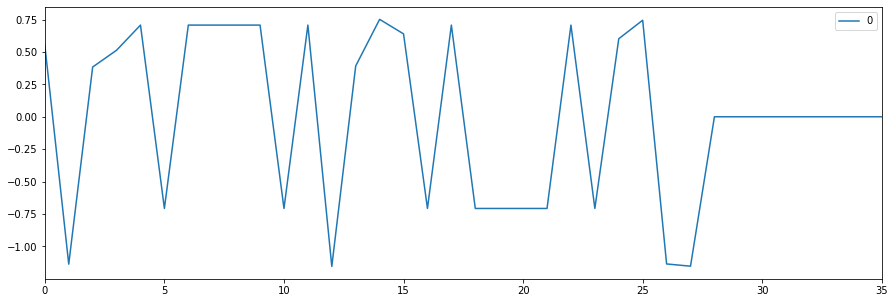

In [133]:
y = monthlyStandardize(new_temp['month'], new_temp['BATTERY'])
y.fillna(value=0, inplace=True)
y.plot(kind='line', figsize=(15,5))

In [134]:
lst = []
indx = 0
while len(lst) < 24:
    temp = [ y[0][i + indx] for i in range(12) ]
    lst.append(temp)
    indx += 1

X = pd.DataFrame(lst)
X.columns = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1']
X

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
0,0.552438,-1.136600,0.383650,0.513124,0.707107,-0.707107,0.707107,0.707107,0.707107,0.707107,-0.707107,0.707107
1,-1.136600,0.383650,0.513124,0.707107,-0.707107,0.707107,0.707107,0.707107,0.707107,-0.707107,0.707107,-1.154347
2,0.383650,0.513124,0.707107,-0.707107,0.707107,0.707107,0.707107,0.707107,-0.707107,0.707107,-1.154347,0.391931
3,0.513124,0.707107,-0.707107,0.707107,0.707107,0.707107,0.707107,-0.707107,0.707107,-1.154347,0.391931,0.751366
4,0.707107,-0.707107,0.707107,0.707107,0.707107,0.707107,-0.707107,0.707107,-1.154347,0.391931,0.751366,0.639278
5,-0.707107,0.707107,0.707107,0.707107,0.707107,-0.707107,0.707107,-1.154347,0.391931,0.751366,0.639278,-0.707107
6,0.707107,0.707107,0.707107,0.707107,-0.707107,0.707107,-1.154347,0.391931,0.751366,0.639278,-0.707107,0.707107
7,0.707107,0.707107,0.707107,-0.707107,0.707107,-1.154347,0.391931,0.751366,0.639278,-0.707107,0.707107,-0.707107
8,0.707107,0.707107,-0.707107,0.707107,-1.154347,0.391931,0.751366,0.639278,-0.707107,0.707107,-0.707107,-0.707107
9,0.707107,-0.707107,0.707107,-1.154347,0.391931,0.751366,0.639278,-0.707107,0.707107,-0.707107,-0.707107,-0.707107


In [138]:
y = [ y[0][i] for i in range(12, 36) ]


y = pd.DataFrame(y)
y.fillna(value=0, inplace=True)

y.head()

KeyError: 24

In [139]:
X_train = X[:18]
X_test = X[18:]
y_train = y[:18]
y_test = y[18:]
print(X_train)
print(X_test)
print(y_train)
print(y_test)

        t-12      t-11      t-10       t-9       t-8       t-7       t-6  \
0   0.552438 -1.136600  0.383650  0.513124  0.707107 -0.707107  0.707107   
1  -1.136600  0.383650  0.513124  0.707107 -0.707107  0.707107  0.707107   
2   0.383650  0.513124  0.707107 -0.707107  0.707107  0.707107  0.707107   
3   0.513124  0.707107 -0.707107  0.707107  0.707107  0.707107  0.707107   
4   0.707107 -0.707107  0.707107  0.707107  0.707107  0.707107 -0.707107   
5  -0.707107  0.707107  0.707107  0.707107  0.707107 -0.707107  0.707107   
6   0.707107  0.707107  0.707107  0.707107 -0.707107  0.707107 -1.154347   
7   0.707107  0.707107  0.707107 -0.707107  0.707107 -1.154347  0.391931   
8   0.707107  0.707107 -0.707107  0.707107 -1.154347  0.391931  0.751366   
9   0.707107 -0.707107  0.707107 -1.154347  0.391931  0.751366  0.639278   
10 -0.707107  0.707107 -1.154347  0.391931  0.751366  0.639278 -0.707107   
11  0.707107 -1.154347  0.391931  0.751366  0.639278 -0.707107  0.707107   
12 -1.154347

Test accuracy:
Root mean squared error = 1.0095
R-square = 0.0000


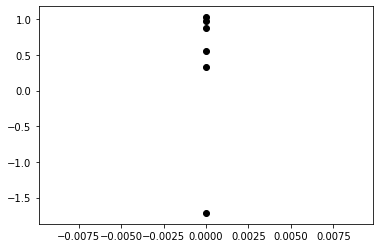

In [140]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred_test = regr.predict(X_test)

print('Test accuracy:')
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R-square = %.4f" % r2_score(y_test, y_pred_test))

plt.scatter(y_test, y_pred_test, color='black')

In [141]:
print('Slope Coefficients:', regr.coef_[0])
print('Intercept:', regr.intercept_[0])

Slope Coefficients: [-0.81057316  0.37022875 -0.06851189 -0.41896544  0.19983444  0.29291388
  0.13014806 -0.07396642 -0.2035163  -0.07508934  0.01238608  0.41670628]
Intercept: 0.03773518603909129
